# Breast Cancer Prediction

## Import package

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score,precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import SpectralClustering


## Supervised, Semi-Supervised, and Unsupervised Learning

### Data Preparation

In [2]:
columns_name=['ID','class','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
df=pd.read_csv('wdbc.data',names=columns_name)
df["class"] = df["class"].replace({"B": 0, "M": 1})
df_M=df[df["class"] == 1].iloc[:round(len(df[df["class"] == 1])*0.2)]
df_B=df[df["class"] == 0].iloc[:round(len(df[df["class"] == 0])*0.2)]
df_test= pd.concat([df_M, df_B], axis = 0)
df_train=df.drop(index=df_test.index,axis=1)

### Build model

#### Supervised Learning

In [3]:
train_accuarcy_ls=[]
test_accuarcy_ls=[]
train_precision_ls=[]
test_precision_ls=[]
train_recall_ls=[]
test_recall_ls=[]
train_F_score_ls=[]
test_F_score_ls=[]
train_AUC_ls=[]
test_AUC_ls=[]
normalized_train_best_params_ls=[]
for i in range(30):
    #randomly select data
    test_M=df[df["class"] == 1].sample(frac=0.2, replace=False, random_state=None)
    test_B=df[df["class"] == 0].sample(frac=0.2, replace=False, random_state=None)
    
    test= pd.concat([test_M, test_B], axis = 0)
    train=df.drop(index=test.index,axis=0)
    
    #extract training and test data
    x_train=train.iloc[:,2:32]
    x_test=test.iloc[:,2:32]
    y_train = train[["class"]]
    y_test=test[["class"]]
    
    # normalized features
    x_train_normalized = preprocessing.normalize(x_train, norm='l2')
    x_train_normalized= pd.DataFrame(x_train_normalized)
    x_train_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_train_normalized.index=x_train.index
    
    x_test_normalized = preprocessing.normalize(x_test, norm='l2')
    x_test_normalized= pd.DataFrame(x_test_normalized)
    x_test_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_test_normalized.index=x_test.index
    
    
    parameters = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    lsvc = GridSearchCV(LinearSVC(penalty = "l1", dual = False), param_grid=parameters, cv = 5)
    normalized_train_model=lsvc.fit(x_train_normalized, y_train)
    normalized_train_best_params=normalized_train_model.best_params_ 
    normalized_train_best_params_ls.append(normalized_train_best_params)
    y_train_pred = normalized_train_model.predict(x_train_normalized)
    y_test_pred = normalized_train_model.predict(x_test_normalized)
    
    #accuarcy
    train_accuracy=accuracy_score(y_train,y_train_pred)
    train_accuarcy_ls.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    test_accuarcy_ls.append(test_accuracy)
    
    #precision
    train_precision=precision_score(y_train,y_train_pred)
    train_precision_ls.append(train_precision)
    test_precision=precision_score(y_test,y_test_pred)
    test_precision_ls.append(test_precision)
    
    #recall
    train_recall=recall_score(y_train,y_train_pred)
    train_recall_ls.append(train_recall)
    test_recall=recall_score(y_test,y_test_pred)
    test_recall_ls.append(test_recall)
    
    #F-score
    train_F_score=f1_score(y_train,y_train_pred)
    train_F_score_ls.append(train_F_score)
    test_F_score=f1_score(y_test,y_test_pred)
    test_F_score_ls.append(test_F_score)
    
    #AUC
    train_AUC=roc_auc_score(y_train,y_train_pred)
    train_AUC_ls.append(train_AUC)
    test_AUC=roc_auc_score(y_test,y_test_pred)
    test_AUC_ls.append(test_AUC)
    
    
print('normalized train best paramters:',normalized_train_best_params_ls)

print('\naccuracy')
print('train average accuracy:',np.mean(train_accuarcy_ls))   
print('test average accuracy:',np.mean(test_accuarcy_ls)) 
print('\nprecision')
print('train average precision:',np.mean(train_precision_ls))   
print('test average precision:',np.mean(test_precision_ls))
print('\nrecall')
print('train average recall:',np.mean(train_recall_ls))   
print('test average recall:',np.mean(test_recall_ls))
print('\nF-score')
print('train average F-score:',np.mean(train_F_score_ls))   
print('test average F-score:',np.mean(test_F_score_ls))
print('\nAUC')
print('train average AUC:',np.mean(train_AUC_ls))   
print('test average AUC:',np.mean(test_AUC_ls))

normalized train best paramters: [{'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}]

accuracy
train average accuracy: 0.9674707602339179
test average accuracy: 0.9530973451327432

precision
train average precision: 0.9595277816147672
test average precision: 0.9480154445114739

recall
train average recall: 0.952941176470588
test average recall: 0.926190476190476

F-score
train average F-score: 0.9561996625303014
test average F-score: 0.9360677791142425

AUC
train average AUC: 0.9645242012889074
test average AUC: 0.9476022803487594


train confusion matrix:
 [[279   7]
 [  8 162]] 



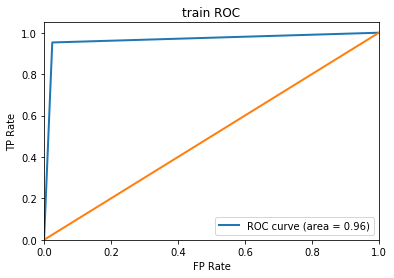

test confusion matrix:
 [[68  3]
 [ 3 39]] 



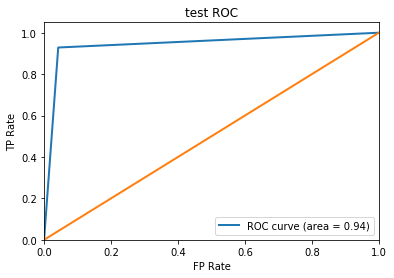

In [5]:
#the confusion matrix on train data
print('train confusion matrix:\n',confusion_matrix(y_train,y_train_pred),'\n')

#show train ROC
FP, TP, thresholds = roc_curve(y_train,y_train_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('train ROC')
plt.legend(loc="lower right")
plt.show()

#the confusion matrix on test data
print('test confusion matrix:\n',confusion_matrix(y_test,y_test_pred),'\n')

#show test ROC
FP, TP, thresholds = roc_curve(y_test,y_test_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('test ROC')
plt.legend(loc="lower right")
plt.show()

#### Semi-Supervised Learning/Self-training

##### Train an L1-penalized SVM to classify the labeled data

In [7]:
normalized_labeled_best_params_ls=[]
for i in range(30):
    #randomly select data
    labeled_M=df_train[df_train["class"] == 1].sample(frac=0.5, replace=False, random_state=None)
    labeled_B=df_train[df_train["class"] == 0].sample(frac=0.5, replace=False, random_state=None)
    labeled_data= pd.concat([labeled_M, labeled_B], axis = 0)
    unlabeled_data=df_train.drop(index=labeled_data.index,axis=0)
    
    #splict features and label
    x_labeled_data=labeled_data.iloc[:,2:32]
    y_labeled_data = labeled_data[["class"]]
    labeled_data = pd.concat([x_labeled_data, y_labeled_data], axis = 1)

    # normalized features
    x_labeled_normalized = preprocessing.normalize(x_labeled_data, norm='l2')
    x_labeled_normalized= pd.DataFrame(x_labeled_normalized)
    x_labeled_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_labeled_normalized.index=x_labeled_data.index
    labeled_normalized_data = pd.concat([x_labeled_normalized, y_labeled_data], axis = 1)

    parameters = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    labeled_lsvc = GridSearchCV(LinearSVC(penalty = "l1", dual = False), param_grid=parameters, cv = 5)
    normalized_labeled_model=labeled_lsvc.fit(x_labeled_normalized,y_labeled_data)
    normalized_labeled_best_params=normalized_labeled_model.best_params_ 
    normalized_labeled_best_params_ls.append(normalized_labeled_best_params)
print('normalized labeled best paramters:',normalized_labeled_best_params_ls)
    

normalized labeled best paramters: [{'C': 100}, {'C': 1}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 100}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}, {'C': 1000}]


##### use SVM label unlabeled data, and add it to the labeled data, and retrain SVM.Test the final SVM on the test data

In [15]:
def unlabeled_estimate(x_labeled_normalized,y_labeled_data,x_unlabeled_normalized,y_unlabeled_data):
    new_labeled_data=pd.concat([x_labeled_normalized,y_labeled_data],axis=1)

    for i in range(len(x_unlabeled_normalized)):
        #train model
        parameters = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        labeled_lsvc = GridSearchCV(LinearSVC(penalty = "l1", dual = False), param_grid=parameters, cv = 5)
        normalized_labeled_model=labeled_lsvc.fit(x_labeled_normalized,y_labeled_data)

        # x_unlabeled_normalized_with_dist
        data_distance=normalized_labeled_model.decision_function(x_unlabeled_normalized)
        data_distance = pd.DataFrame(data_distance, columns = ["distance"], index = x_unlabeled_data.index)
        data_distance["distance"].map(lambda x: abs(x))
        x_unlabeled_normalized_with_dist = pd.concat([data_distance, x_unlabeled_normalized], axis = 1)
        x_unlabeled_normalized_with_dist["distance_abs"] = x_unlabeled_normalized_with_dist["distance"].map(lambda x: abs(x))

        # sort x_unlabeled_normalized_with_dist
        x_unlabeled_normalized_with_dist=x_unlabeled_normalized_with_dist.sort_values(by="distance_abs" , ascending=False)
        x_unlabeled_normalized_with_dist.drop(['distance_abs'],axis=1)

        # extract farest data
        farthest_unlabeled_data = x_unlabeled_normalized_with_dist[x_unlabeled_normalized.columns].head(1)

        if float(x_unlabeled_normalized_with_dist.head(1)["distance"]) > 0:
            farthest_unlabeled_data["class"] = 1 
        else:
            farthest_unlabeled_data["class"] = 0

        # put the labeled test data into training set
        new_labeled_data = labeled_normalized_data.append(farthest_unlabeled_data)  # append one new row
        
        #extract new x and new y
        x_new_labeled_data=new_labeled_data.iloc[:,:-1]
        y_new_labeled_data=new_labeled_data['class']
        
        #drop the farthest unlabeled data from unlabeled data set
        x_unlabeled_normalized_with_dist.drop(x_unlabeled_normalized_with_dist.head(1).index,axis=0)
        
    return normalized_labeled_model

In [16]:
train_accuarcy_ls=[]
test_accuarcy_ls=[]
train_precision_ls=[]
test_precision_ls=[]
train_recall_ls=[]
test_recall_ls=[]
train_F_score_ls=[]
test_F_score_ls=[]
train_AUC_ls=[]
test_AUC_ls=[]
for i in range(30):
    labeled_M=df_train[df_train["class"] == 1].sample(frac=0.5, replace=False, random_state=None)
    labeled_B=df_train[df_train["class"] == 0].sample(frac=0.5, replace=False, random_state=None)
    labeled_data= pd.concat([labeled_M, labeled_B], axis = 0)
    unlabeled_data=df_train.drop(index=labeled_data.index,axis=0)
    
    #labeled
    #splict features and label
    x_labeled_data=labeled_data.iloc[:,2:32]
    y_labeled_data = labeled_data[["class"]]
    labeled_data = pd.concat([x_labeled_data, y_labeled_data], axis = 1)

    # normalized features
    x_labeled_normalized = preprocessing.normalize(x_labeled_data, norm='l2')
    x_labeled_normalized= pd.DataFrame(x_labeled_normalized)
    x_labeled_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_labeled_normalized.index=x_labeled_data.index
    labeled_normalized_data = pd.concat([x_labeled_normalized, y_labeled_data], axis = 1)
    
    #unlabeled
    #splict features and label
    x_unlabeled_data=unlabeled_data.iloc[:,2:32]
    y_unlabeled_data =unlabeled_data[["class"]]

    # normalized features
    x_unlabeled_normalized = preprocessing.normalize(x_unlabeled_data, norm='l2')
    x_unlabeled_normalized= pd.DataFrame(x_unlabeled_normalized)
    x_unlabeled_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_unlabeled_normalized.index=x_unlabeled_data.index
    
    model=unlabeled_estimate(x_labeled_normalized=x_labeled_normalized,
                             y_labeled_data=y_labeled_data,
                             x_unlabeled_normalized=x_unlabeled_normalized,
                             y_unlabeled_data=y_unlabeled_data)

    
    y_train_pred= model.predict(x_labeled_normalized)
    y_test_pred = model.predict(x_test_normalized)
    
    
    #accuarcy
    train_accuracy=accuracy_score(y_labeled_data,y_train_pred)
    train_accuarcy_ls.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    test_accuarcy_ls.append(test_accuracy)
    
    #precision
    train_precision=precision_score(y_labeled_data,y_train_pred)
    train_precision_ls.append(train_precision)
    test_precision=precision_score(y_test,y_test_pred)
    test_precision_ls.append(test_precision)
    
    #recall
    train_recall=recall_score(y_labeled_data,y_train_pred)
    train_recall_ls.append(train_recall)
    test_recall=recall_score(y_test,y_test_pred)
    test_recall_ls.append(test_recall)
    
    #F-score
    train_F_score=f1_score(y_labeled_data,y_train_pred)
    train_F_score_ls.append(train_F_score)
    test_F_score=f1_score(y_test,y_test_pred)
    test_F_score_ls.append(test_F_score)
    
    #AUC
    train_AUC=roc_auc_score(y_labeled_data,y_train_pred)
    train_AUC_ls.append(train_AUC)
    test_AUC=roc_auc_score(y_test,y_test_pred)
    test_AUC_ls.append(test_AUC)
    

print('\naccuracy')
print('train average accuracy:',np.mean(train_accuarcy_ls))   
print('test average accuracy:',np.mean(test_accuarcy_ls)) 
print('\nprecision')
print('train average precision:',np.mean(train_precision_ls))   
print('test average precision:',np.mean(test_precision_ls))
print('\nrecall')
print('train average recall:',np.mean(train_recall_ls))   
print('test average recall:',np.mean(test_recall_ls))
print('\nF-score')
print('train average F-score:',np.mean(train_F_score_ls))   
print('test average F-score:',np.mean(test_F_score_ls))
print('\nAUC')
print('train average AUC:',np.mean(train_AUC_ls))   
print('test average AUC:',np.mean(test_AUC_ls))



accuracy
train average accuracy: 0.9650584795321635
test average accuracy: 0.9752212389380531

precision
train average precision: 0.959544381598386
test average precision: 0.9807828274958167

recall
train average recall: 0.9462745098039215
test average recall: 0.9523809523809522

F-score
train average F-score: 0.952781514283299
test average F-score: 0.9661697634017515

AUC
train average AUC: 0.9612491430138488
test average AUC: 0.9705566733735747


train confusion matrix:
 [[139   4]
 [  5  80]] 



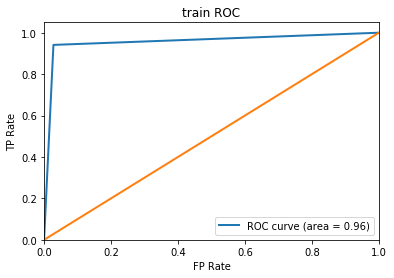

test confusion matrix:
 [[70  1]
 [ 1 41]] 



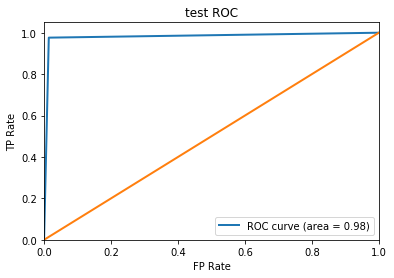

In [17]:
#the confusion matrix on train data
print('train confusion matrix:\n',confusion_matrix(y_labeled_data,y_train_pred),'\n')

#show train ROC
FP, TP, thresholds = roc_curve(y_labeled_data,y_train_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('train ROC')
plt.legend(loc="lower right")
plt.show()

#the confusion matrix on test data
print('test confusion matrix:\n',confusion_matrix(y_test,y_test_pred),'\n')

#show test ROC
FP, TP, thresholds = roc_curve(y_test,y_test_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('test ROC')
plt.legend(loc="lower right")
plt.show()

#### Unsupervised Learning

<font color=black size=3 face=雅黑>(A)We can run K-means multiple times to make sure the algorithm is not trapped in a loacal minimum, setting n_init = 100. According to the documentation for KMeans, the final results will be the best output of n_init consecutive runs in terms of inertia. If we run it k^n times and choosing the best out of those, we would be guaranteed to find the global minimum, but that would be really time consuming. Therefore, increasing n_init can help avoiding falling into local minimum.</font>

##### k-means predict label

In [431]:
train_accuarcy_ls=[]
train_precision_ls=[]
train_recall_ls=[]
train_F_score_ls=[]
train_AUC_ls=[]
for i in range(30):
    #randomly select data
    test_M=df[df["class"] == 1].sample(frac=0.2, replace=False, random_state=None)
    test_B=df[df["class"] == 0].sample(frac=0.2, replace=False, random_state=None)
    
    test= pd.concat([test_M, test_B], axis = 0)
    train=df.drop(index=test.index,axis=0)
    
    #extract training data
    x_train=train.iloc[:,2:32]
    y_train = train[["class"]]
    
    # normalized features
    x_train_normalized = preprocessing.normalize(x_train, norm='l2')
    x_train_normalized= pd.DataFrame(x_train_normalized)
    x_train_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_train_normalized.index=x_train.index

    
    #k-means algorithm
    kmeans = KMeans(n_clusters = 2, init = "random", n_init = 100)
    model=kmeans.fit(x_train_normalized)    
    centers=kmeans.cluster_centers_

    distance_ls_0=[]
    distance_ls_1=[]
    for i in range(len(x_train_normalized)):    
        distance_ls_0.append(distance.euclidean(kmeans.cluster_centers_[0],x_train_normalized.iloc[i].tolist()))
        distance_ls_1.append(distance.euclidean(kmeans.cluster_centers_[1],x_train_normalized.iloc[i].tolist()))

    new_0=x_train_normalized.copy()
    new_0['true_class']=kmeans.labels_
    new_1=x_train_normalized.copy()
    new_1['true_class']=kmeans.labels_
    new_0["distance_0"]=distance_ls_0
    new_1["distance_1"]=distance_ls_1
    closest_new_0=new_0.sort_values(by=['distance_0'],ascending = True).iloc[:30]
    closest_new_1=new_1.sort_values(by=['distance_1'],ascending = True).iloc[:30]
    majority_0=closest_new_0['true_class'].value_counts().index[0]
    majority_1=closest_new_1['true_class'].value_counts().index[0]
    majority_0

    cluster_train_df = x_train_normalized.copy()
    cluster_train_df['cluster'] = kmeans.labels_
    cluster_train_df['Pred'] = cluster_train_df.apply(lambda x: majority_0 if x['cluster'] == 0 \
                                                                  else majority_1, axis=1)
    y_train_predict=cluster_train_df['Pred']

    #accuarcy
    train_accuracy=accuracy_score(y_train,y_train_predict)
    if train_accuracy<0.5:
        y_train_predict=1-y_train_predict
        train_accuracy=accuracy_score(y_train,y_train_predict)
        train_precision=precision_score(y_train,y_train_predict)
        train_recall=recall_score(y_train,y_train_predict)
        train_F_score=f1_score(y_train,y_train_predict)
        train_AUC=roc_auc_score(y_train,y_train_predict)
    
    train_accuarcy_ls.append(train_accuracy)

    #precision
    train_precision_ls.append(train_precision)
   
    #recall
    train_recall_ls.append(train_recall)

    #F-score
    train_F_score_ls.append(train_F_score)
    
    #AUC
    train_AUC_ls.append(train_AUC)


print('\naccuracy')
print('train average accuracy:',np.mean(train_accuarcy_ls))   
    
print('\nprecision')
print('train average precision:',np.mean(train_precision_ls))   
    
print('\nrecall')
print('train average recall:',np.mean(train_recall_ls))   
    
print('\nF-score')
print('train average F-score:',np.mean(train_F_score_ls))   
    
print('\nAUC')
print('train average AUC:',np.mean(train_AUC_ls))   


accuracy
train average accuracy: 0.8875730994152048

precision
train average precision: 0.9641199114416589

recall
train average recall: 0.7288235294117649

F-score
train average F-score: 0.829822156718542

AUC
train average AUC: 0.8563115316056494


train confusion matrix:
 [[278   8]
 [ 41 129]] 



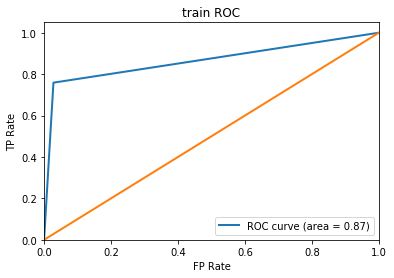

In [313]:
#the confusion matrix on train data
print('train confusion matrix:\n',confusion_matrix(y_train,y_train_predict),'\n')

#show train ROC
FP, TP, thresholds = roc_curve(y_train,y_train_predict)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('train ROC')
plt.legend(loc="lower right")
plt.show()


##### Classify test data

In [427]:
test_accuarcy_ls=[]
test_precision_ls=[]
test_recall_ls=[]
test_F_score_ls=[]
test_AUC_ls=[]
for i in range(30):
    #randomly select data
    test_M=df[df["class"] == 1].sample(frac=0.2, replace=False, random_state=None)
    test_B=df[df["class"] == 0].sample(frac=0.2, replace=False, random_state=None)
    
    test= pd.concat([test_M, test_B], axis = 0)
    
    #extract test data
    x_test=test.iloc[:,2:32]
    y_test=test[["class"]]
    
    # normalized features      
    x_test_normalized = preprocessing.normalize(x_test, norm='l2')
    x_test_normalized= pd.DataFrame(x_test_normalized)
    x_test_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_test_normalized.index=x_test.index

    
    #k-means algorithm
    kmeans = KMeans(n_clusters = 2, init = "random", n_init = 100)
    model=kmeans.fit(x_test_normalized)    
    centers=kmeans.cluster_centers_

    distance_ls_0=[]
    distance_ls_1=[]
    for i in range(len(x_test_normalized)):    
        distance_ls_0.append(distance.euclidean(kmeans.cluster_centers_[0],x_test_normalized.iloc[i].tolist()))
        distance_ls_1.append(distance.euclidean(kmeans.cluster_centers_[1],x_test_normalized.iloc[i].tolist()))

    new_0=x_test_normalized.copy()
    new_0['true_class']=kmeans.labels_
    new_1=x_test_normalized.copy()
    new_1['true_class']=kmeans.labels_
    new_0["distance_0"]=distance_ls_0
    new_1["distance_1"]=distance_ls_1
    closest_new_0=new_0.sort_values(by=['distance_0'],ascending = True).iloc[:30]
    closest_new_1=new_1.sort_values(by=['distance_1'],ascending = True).iloc[:30]
    majority_0=closest_new_0['true_class'].value_counts().index[0]
    majority_1=closest_new_1['true_class'].value_counts().index[0]

    cluster_test_df = x_test_normalized.copy()
    cluster_test_df["distance_0"]=distance_ls_0
    cluster_test_df["distance_1"]=distance_ls_1
    cluster_test_df['Pred'] = cluster_test_df.apply(lambda x: majority_0 if x["distance_0"] > x["distance_1"] \
                                                                  else majority_1, axis=1)
    y_test_predict=cluster_test_df['Pred']

    #accuarcy
    test_accuracy=accuracy_score(y_test,y_test_predict)
    if test_accuracy<0.5:
        y_test_predict=1-y_test_predict
        test_accuracy=accuracy_score(y_test,y_test_predict)
        test_precision=precision_score(y_test,y_test_predict)
        test_recall=recall_score(y_test,y_test_predict)
        test_F_score=f1_score(y_test,y_test_predict)
        test_AUC=roc_auc_score(y_test,y_test_predict)
    test_accuarcy_ls.append(test_accuracy)

    #precision
    test_precision_ls.append(test_precision)
   
    #recall
    test_recall_ls.append(test_recall)

    #F-score
    test_F_score_ls.append(test_F_score)
    
    #AUC
    test_AUC_ls.append(test_AUC)


print('\naccuracy')
print('test average accuracy:',np.mean(test_accuarcy_ls))   
    
print('\nprecision')
print('test average precision:',np.mean(test_precision_ls))   
    
print('\nrecall')
print('test average recall:',np.mean(test_recall_ls))   
    
print('\nF-score')
print('test average F-score:',np.mean(test_F_score_ls))   
    
print('\nAUC')
print('test average AUC:',np.mean(test_AUC_ls))   


accuracy
test average accuracy: 0.876991150442478

precision
test average precision: 0.8385466890276327

recall
test average recall: 0.6333333333333334

F-score
test average F-score: 0.7140937697294018

AUC
test average AUC: 0.8409121395036888


test confusion matrix:
 [[71  0]
 [10 32]] 



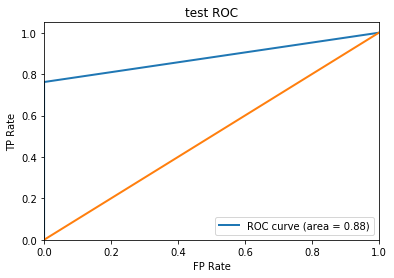

In [435]:
#the confusion matrix on test data
print('test confusion matrix:\n',confusion_matrix(y_test,y_test_predict),'\n')

#show test ROC
FP, TP, thresholds = roc_curve(y_test,y_test_predict)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('test ROC')
plt.legend(loc="lower right")
plt.show()

#### Spectral Clustering

In [448]:
train_accuarcy_ls=[]
test_accuarcy_ls=[]
train_precision_ls=[]
test_precision_ls=[]
train_recall_ls=[]
test_recall_ls=[]
train_F_score_ls=[]
test_F_score_ls=[]
train_AUC_ls=[]
test_AUC_ls=[]
for i in range(30):
    #randomly select data
    test_M=df[df["class"] == 1].sample(frac=0.2, replace=False, random_state=None)
    test_B=df[df["class"] == 0].sample(frac=0.2, replace=False, random_state=None)
    
    test= pd.concat([test_M, test_B], axis = 0)
    train=df.drop(index=test.index,axis=0)
    
    #extract training and test data
    x_train=train.iloc[:,2:32]
    x_test=test.iloc[:,2:32]
    y_train = train[["class"]]
    y_test=test[["class"]]
    
    # normalized features
    x_train_normalized = preprocessing.normalize(x_train, norm='l2')
    x_train_normalized= pd.DataFrame(x_train_normalized)
    x_train_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_train_normalized.index=x_train.index
    
    x_test_normalized = preprocessing.normalize(x_test, norm='l2')
    x_test_normalized= pd.DataFrame(x_test_normalized)
    x_test_normalized.columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
    x_test_normalized.index=x_test.index
    
    #SpectralClustering fit_predict x
    spectral = SpectralClustering(n_clusters=2, n_init=100, gamma=1.0, affinity='rbf')  
    y_train_pred = spectral.fit_predict(x_train_normalized)
    y_test_pred = spectral.fit_predict(x_test_normalized)
    
    #accuarcy
    train_accuracy=accuracy_score(y_train,y_train_pred)
    train_accuarcy_ls.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    test_accuarcy_ls.append(test_accuracy)
    
    #precision
    train_precision=precision_score(y_train,y_train_pred)
    train_precision_ls.append(train_precision)
    test_precision=precision_score(y_test,y_test_pred)
    test_precision_ls.append(test_precision)
    
    #recall
    train_recall=recall_score(y_train,y_train_pred)
    train_recall_ls.append(train_recall)
    test_recall=recall_score(y_test,y_test_pred)
    test_recall_ls.append(test_recall)
    
    #F-score
    train_F_score=f1_score(y_train,y_train_pred)
    train_F_score_ls.append(train_F_score)
    test_F_score=f1_score(y_test,y_test_pred)
    test_F_score_ls.append(test_F_score)
    
    #AUC
    train_AUC=roc_auc_score(y_train,y_train_pred)
    train_AUC_ls.append(train_AUC)
    test_AUC=roc_auc_score(y_test,y_test_pred)
    test_AUC_ls.append(test_AUC)
    
    
print('\naccuracy')
print('train average accuracy:',np.mean(train_accuarcy_ls))   
print('test average accuracy:',np.mean(test_accuarcy_ls)) 
print('\nprecision')
print('train average precision:',np.mean(train_precision_ls))   
print('test average precision:',np.mean(test_precision_ls))
print('\nrecall')
print('train average recall:',np.mean(train_recall_ls))   
print('test average recall:',np.mean(test_recall_ls))
print('\nF-score')
print('train average F-score:',np.mean(train_F_score_ls))   
print('test average F-score:',np.mean(test_F_score_ls))
print('\nAUC')
print('train average AUC:',np.mean(train_AUC_ls))   
print('test average AUC:',np.mean(test_AUC_ls))



accuracy
train average accuracy: 0.7007309941520468
test average accuracy: 0.6769911504424779

precision
train average precision: 0.7721888495720051
test average precision: 0.7270277418900793

recall
train average recall: 0.6021568627450979
test average recall: 0.5968253968253968

F-score
train average F-score: 0.6663310731251346
test average F-score: 0.6445374282210998

AUC
train average AUC: 0.6807404360345539
test average AUC: 0.6606192711826515


train confusion matrix:
 [[281   5]
 [ 46 124]] 



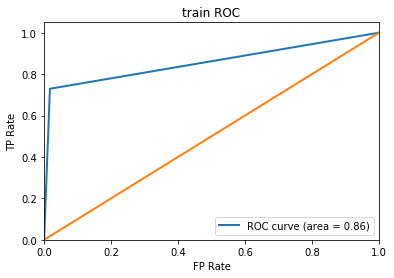

test confusion matrix:
 [[69  2]
 [14 28]] 



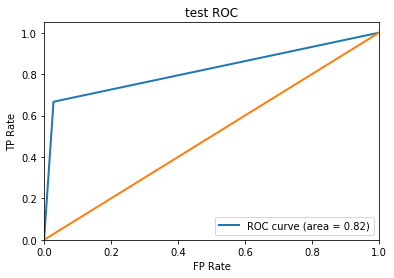

In [449]:
#the confusion matrix on train data
print('train confusion matrix:\n',confusion_matrix(y_train,y_train_pred),'\n')

#show train ROC
FP, TP, thresholds = roc_curve(y_train,y_train_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('train ROC')
plt.legend(loc="lower right")
plt.show()

#the confusion matrix on test data
print('test confusion matrix:\n',confusion_matrix(y_test,y_test_pred),'\n')

#show test ROC
FP, TP, thresholds = roc_curve(y_test,y_test_pred)
roc_auc = auc(FP, TP)

plt.figure()
plt.plot(FP, TP, lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('test ROC')
plt.legend(loc="lower right")
plt.show()

<font color=black size=4 face=雅黑>(v) Answer: Compare three methods, Supervised learning on the full data set performs better than Semi-Supervised learning, because the model is not only well trained and the labels are provided by the experts. However, for semi-supervised learning, some of the labels are predicted by the classifier. It is apparent that the accuracy define by the experts are higher.For Unsupervised learning, it underperforms than Supervised learning because we according their similarity to classify them, but actually,they don't have same label.</font>